In [12]:
#Multiclass Classification RandomForest https://www.codementor.io/@agarrahul01/multiclass-classification-using-random-forest-on-scikit-learn-library-hkk4lwawu
#Adjusted Revenue Classification based on whisker plot 
#high	>244,174,434
#mid-high	94,654,092-244,174,434'
#mid-low	27,690,571 -94,654,092 '
#low	0-27,690,571'


#Importing Libraries
import numpy as np
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Import dataset
df = pd.read_csv("C:\\Users\\corts033\\Documents\\Personal\\Geo Tech\\CSE 6242\\Project\\cleaned_movies_NEW.csv")
df.columns

Index(['budget', 'homepage', 'movie_id', 'original_language', 'original_title',
       'overview', 'popularity', 'release_date', 'revenue', 'runtime',
       'status', 'tagline', 'title', 'vote_average', 'vote_count',
       'release_year', 'release_month', 'day_of_week_release', 'has_homepage',
       'num_spoken_languages', 'num_production_companies', 'num_genres',
       'genre_Horror', 'genre_War', 'genre_Adventure', 'genre_Western',
       'genre_Comedy', 'genre_Mystery', 'genre_Romance',
       'genre_Science_Fiction', 'genre_Action', 'genre_Thriller',
       'genre_Crime', 'genre_TV_Movie', 'genre_Animation', 'genre_Foreign',
       'genre_Fantasy', 'genre_Drama', 'genre_Documentary', 'genre_Family',
       'genre_Music', 'genre_History', 'keywords_list',
       'production_companies_list', 'production_countries_list', 'cast_size',
       'cast_member_list', 'cast_1', 'cast_2', 'cast_3', 'cast_4', 'cast_5',
       'cpi', 'revenue_adjusted', 'holiday_release', 'cast_1_vote_averag

In [14]:
df.drop_duplicates(keep='first', inplace=True)
y = df[['revenue_adjusted']]
print(y[1:100])
X = df[['budget','runtime',
        'jan_release','feb_release','mar_release','apr_release','may_release',
       'jun_release','jul_release','aug_release','sep_release','oct_release',
       'nov_release','dec_release','sun_release','mon_release','tue_release',
       'wed_release','thur_release','fri_release','sat_release',
        'genre_Horror', 'genre_War',
       'genre_Adventure', 'genre_Western', 'genre_Comedy', 'genre_Mystery',
       'genre_Romance', 'genre_Science_Fiction', 'genre_Action',
       'genre_Thriller', 'genre_Crime', 'genre_TV_Movie', 'genre_Animation',
       'genre_Foreign', 'genre_Fantasy', 'genre_Drama', 'genre_Documentary',
       'genre_Family', 'genre_Music', 'genre_History','cast_size','holiday_release', 'cast_1_vote_average',
       'cast_1_movie_count', 'cast_2_vote_average', 'cast_2_movie_count',
       'cast_3_vote_average', 'cast_3_movie_count', 'cast_4_vote_average',
       'cast_4_movie_count', 'cast_5_vote_average', 'cast_5_movie_count',
       'keywords_holiday_celebrate', 'keywords_violence_war_crime',
       'keywords_superhero', 'keywords_creditstinger_3d',
       'keywords_womandirector_independentfilm',
       'keywords_future_robots_aliens',
       'keywords_edgy_alcohol_drug_sex_nudity', 'keywords_music',
       'keywords_animal_nature']]
X = X.fillna(0)

cols = X.columns

y_class =  np.where(y>=244174434 , 4, np.where((y<244174434) & (y>=94654092)  , 3, np.where((y<94654092) & (y>=27690571), 2, np.where(y<27690571, 1, 0))))

#Feature scaling basically helps to normalize the data within a particular range. Normally several common class types contain the feature scaling function so that they make feature scaling automatically. 
sc_X = StandardScaler()
#sc_y = StandardScaler()
X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y)


     revenue_adjusted
1        1.356688e+09
2        1.087407e+09
3        1.382932e+09
4        3.621816e+08
5        1.257685e+09
..                ...
102      1.107955e+09
103      9.389074e+07
104      1.301563e+09
105      3.425335e+08
106      4.539040e+08

[99 rows x 1 columns]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y_class, train_size=0.80, test_size=0.20, random_state=42)

In [16]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
filename = 'C:\\Users\\corts033\\Documents\\Personal\\Geo Tech\\CSE 6242\\Project\\random_forest_classification.pkl'
pickle.dump(classifier, open(filename, 'wb'))

C:\Users\corts033\AppData\Local\Temp\1\ipykernel_30020\2877889828.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


In [17]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(max(y_pred))
print(max(y_test))
y_test_table=  [item for sublist in y_test for item in sublist]
#Reverse factorize (converting y_pred from 0s,1s and 2s to Iris-setosa, Iris-versicolor and Iris-virginica
#reversefactor = dict(zip(range(3),definitions))
#y_test = np.vectorize(reversefactor.get)(y_test)
#y_pred = np.vectorize(reversefactor.get)(y_pred)
# Making the Confusion Matrix
print(pd.crosstab(y_test_table, y_pred, rownames=['Actual Revenue Group'], colnames=['Predicted Rev Group']))

4
[4]
Predicted Rev Group    1   2   3   4
Actual Revenue Group                
1                     97  36  11   2
2                     52  73  31  11
3                     25  42  45  37
4                     12  26  36  98


In [18]:
#https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56
# View accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test_table, y_pred )

0.49369085173501576

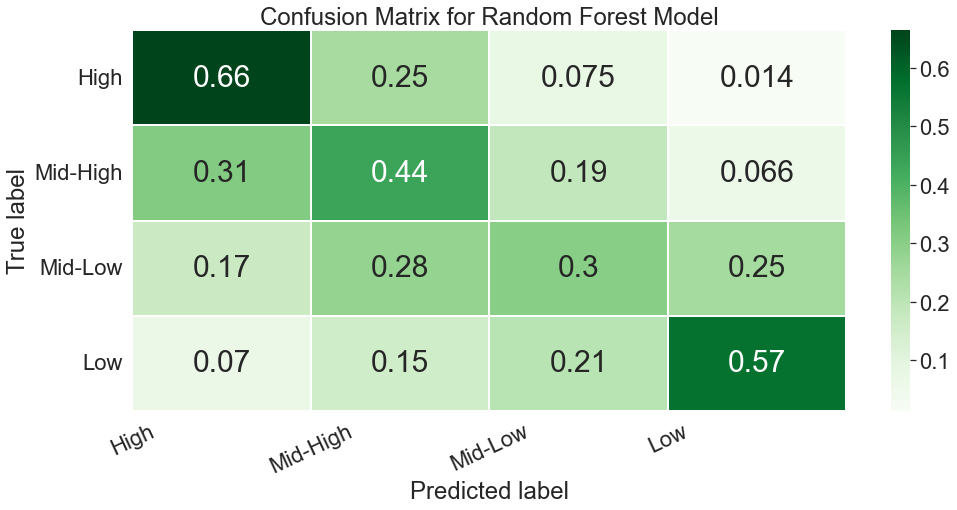

In [19]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_table, y_pred )
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=2)
sns.heatmap(matrix, annot=True, annot_kws={'size':30},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['High','Mid-High','Mid-Low','Low']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [20]:
print(classification_report(y_test_table, y_pred))

              precision    recall  f1-score   support

           1       0.52      0.66      0.58       146
           2       0.41      0.44      0.42       167
           3       0.37      0.30      0.33       149
           4       0.66      0.57      0.61       172

    accuracy                           0.49       634
   macro avg       0.49      0.49      0.49       634
weighted avg       0.49      0.49      0.49       634

